Steven Ruzzin Sports Analytics Final Project MIS665

On my honor, as a student, I have neither given nor received
unauthorized aid on this academic work.

## Introduction

In the sports analytics data set and in the attached Powerpoint, I will go through how i arrived at my conclusions and how the information is useful.

For this Python Code, I performed the data cleaning and analytics procedures frist, and at the end of the code scribed my conclusions. For the sake of showing process, I did not remove several of the ideas I had to manipulate the data for a cleaner product. I chose to leave some of these examples in. For the most part, they were either non-consequential, or did not function correctly. Occassionally, they did, and I adapted them to the useful code. Because of this choice, the code itself is a little messy, my appologies. The storytelling section at the bottom will present the data and tell how I came to my conclusions.

Thank You,
Steven

Description of attributes in the data set for the reader's reference.

FAKEID	the ticket buyer's unique ID number

YXdefect 	"X" indicates the year
	Y3defect=1 for year 2 ticket holders that did not renew for year 3
	Y3defect=0 for year 2 ticket holders that did renew for year 3
	Y2defect=1 for year 1 ticket holders that did not renew for year 2
	Y2defect=0 for year 1 ticket holders that did renew for year 2

YXGZ	"X" indicates the year, "Z" indicates the game
	e.g. Y2G4=1 for the tickets being used for game 4 in year 2
	e.g. Y2G4=0 for the tickets not being used for game 4 in year 2

YXprice	"X" indicates the year
	the price paid per ticket in the indicated year

YEARS	the number of years as a season ticket holder

BACKER	1=member of the team's "backer" club
	0=not a member of the team's "backer" club

AGE	age of the ticket buyer (blank=unknown)

INCOME	income category of the ticket buyer (0=low, 6=high)

CHILD	1=at least one child age 0-18 in household (blank indicates none or unknown)

GNDR	1=male, 0=female, blank=unknown

OWNHOME	1=owns home, 0=does not own home, blank=unknown

SPORT	purchased appended data
	1=subscribes to a sports magazine, 0=does not subscribe to a sports magazine, blank = unknown

COMP	purchased appended data
	1=owns a PC (blank indicates does not own a PC or unknown)

PCTMARR	appended census data at zip code level
	percentage of married heads of household

HOMEVAL	appended census data at zip code level
	average value of homes in 1000s of dollars

In [236]:
#Loading in features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import pairwise_distances

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pandas.tools.plotting import parallel_coordinates

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Normalizer

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

from bokeh.io import output_notebook, show
from bokeh.charts import HeatMap, bins, show

In [237]:
#Loading in dataset1
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [238]:
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,4273.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,0.056869,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,0.250085,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,0.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,0.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,3.000000,99.000000,600.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [240]:
# replacing undefined data with NaN
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [241]:
#Checking data types and data to see how many NaN values exist
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [242]:
df.corr()
#checking correlation to see how the different attributes interact.

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.026752,0.011297,NaN,0.008438,-0.022388,0.020711,NaN,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.033328,-0.000170,NaN,-0.008892,0.020323,0.002598,NaN,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.069956,0.009055,NaN,-0.002689,0.044501,0.025304,NaN,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.031497,0.022160,NaN,-0.001742,-0.030716,-0.000396,NaN,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.110889,-0.015289,NaN,-0.005443,-0.004643,-0.002006,NaN,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.098407,-0.031850,NaN,-0.026223,-0.002491,0.002462,NaN,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.032464,0.080680,NaN,0.045249,-0.018029,0.018550,NaN,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.323799,-0.100790,NaN,-0.013408,-0.011307,-0.049982,NaN,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.207643,-0.095961,NaN,-0.024022,-0.018135,-0.037559,NaN,0.032558,-0.064727
AGE,-0.026752,0.033328,-0.069956,-0.031497,0.110889,0.098407,-0.032464,0.323799,0.207643,1.000000,-0.248853,NaN,0.021664,-0.085298,-0.048280,NaN,-0.060747,-0.016393


In [243]:
#COMP columns have too many missing values to be consistently relevant.
# Replaced null values with 0 for sport and Child
df1 = df
df1['SPORT'] = df1['SPORT'].fillna(0)
df1 = df1.drop(['COMP'], axis=1)
df1 = df1.drop(['CHILD'], axis=1)
df1 = df1.drop(['GNDR'], axis=1)
df1['INCOME'] = df1['INCOME'].fillna(3)

df1.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,1.0,0.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,3.0,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,1.0,0.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,0.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,0.0,65,194


In [244]:
# I cleared the data that was too vague or had too many NaN values. I chose to fill INCOME with the median value
# and SPORT with 0's (asuming if they didn't answer yes the answer was no)
df1.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME         0
OWNHOME     1999
SPORT          0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [245]:
df2 = df1
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      9216 non-null float64
OWNHOME     7217 non-null float64
SPORT       9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


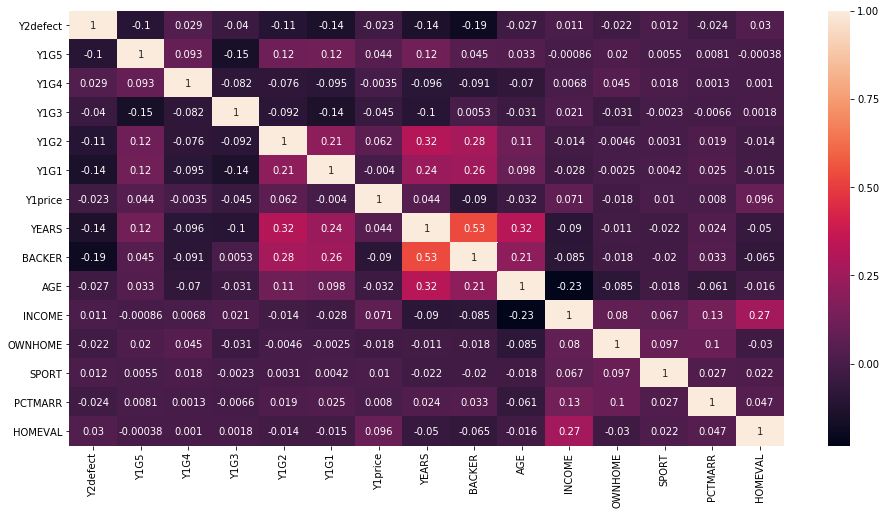

In [246]:
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(), annot=True)

In [247]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      9216 non-null float64
OWNHOME     7217 non-null float64
SPORT       9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


In [248]:
#I've now cut out all rows that have multiple non-entries in them, leaving us with the most complete data set. 
#There are no longer any rows with multiple NaN values.
#This cut us down to 7459 rows from the original 9216 (EDIT)
df3 = df2
#dropping the remaining values leaves us with 5986 values left
df3 = df3.dropna()
df3.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,1.0,0.0,77,203
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,1.0,0.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,0.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,0.0,65,194
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,1.0,0.0,50,483


In [249]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 0 to 9214
Data columns (total 16 columns):
FAKEID      5715 non-null object
Y2defect    5715 non-null int64
Y1G5        5715 non-null int64
Y1G4        5715 non-null int64
Y1G3        5715 non-null int64
Y1G2        5715 non-null int64
Y1G1        5715 non-null int64
Y1price     5715 non-null int64
YEARS       5715 non-null int64
BACKER      5715 non-null int64
AGE         5715 non-null float64
INCOME      5715 non-null float64
OWNHOME     5715 non-null float64
SPORT       5715 non-null float64
PCTMARR     5715 non-null int64
HOMEVAL     5715 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 759.0+ KB


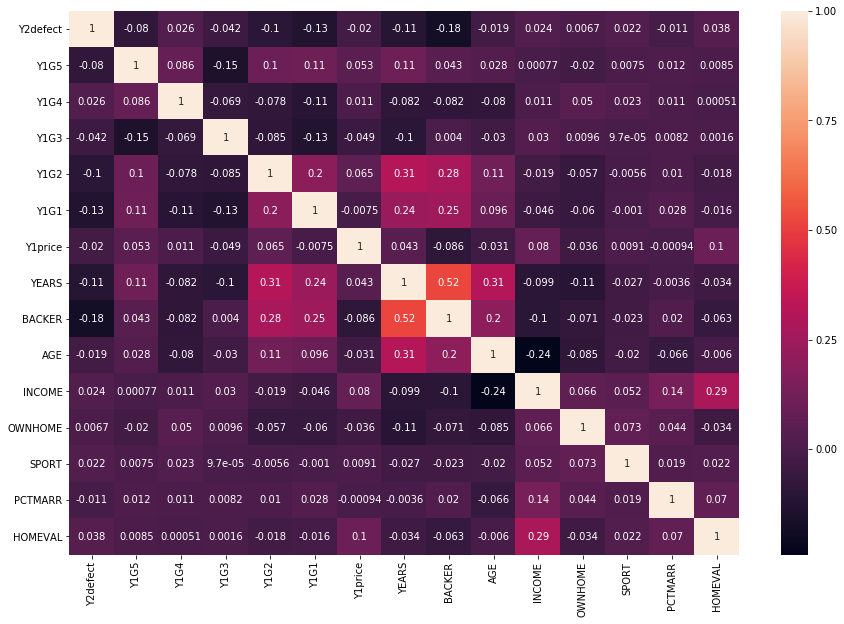

In [250]:
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(), annot=True)

C:\Users\Steven Ruzzin\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Steven Ruzzin\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


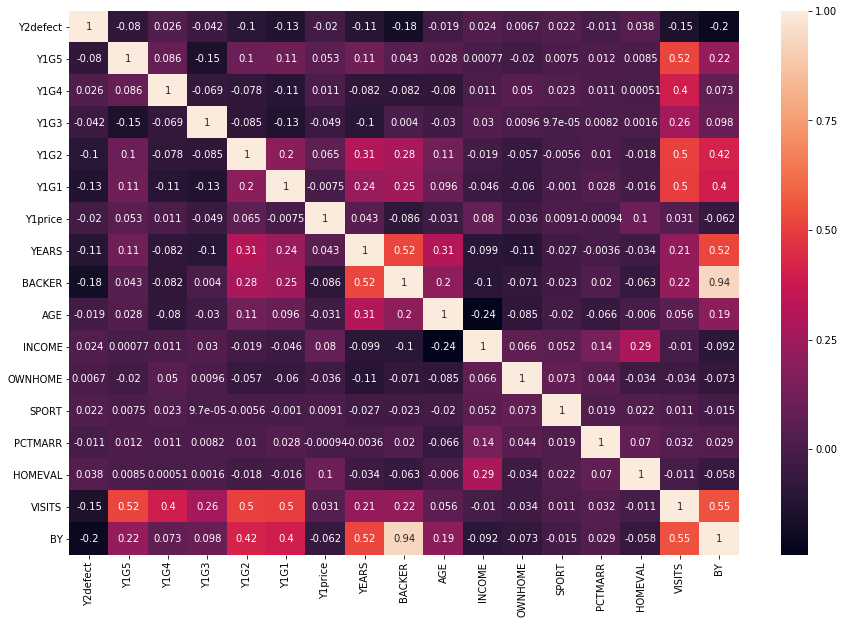

In [251]:
df3['VISITS'] = df3['Y1G1'] + df3['Y1G2'] + df3['Y1G3'] + df3['Y1G4'] + df3['Y1G5']
df3['BY'] = df3['BACKER'] + (df3['VISITS']/5)

plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(), annot=True)

C:\Users\Steven Ruzzin\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Steven Ruzzin\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


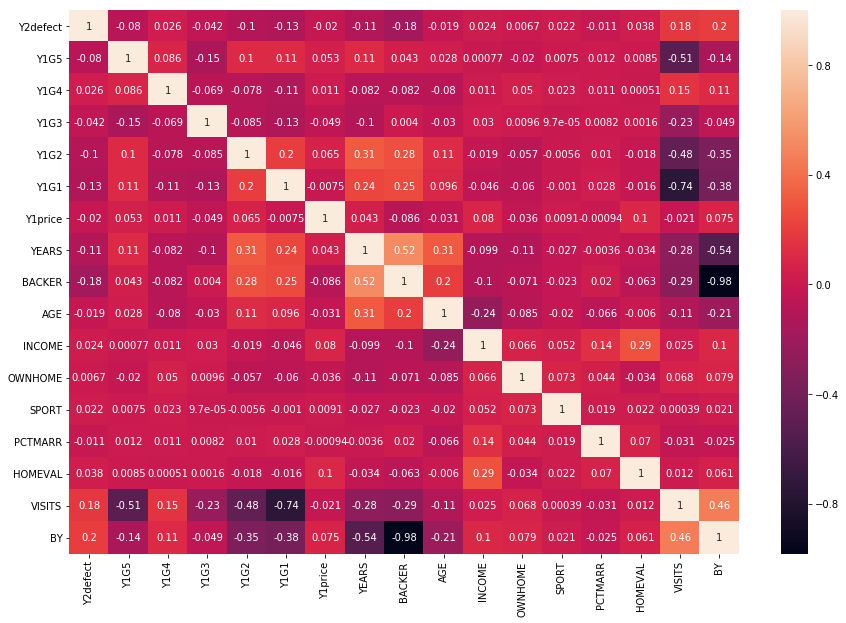

In [319]:
df3['VISITS'] = (df3['Y1G1']*(-0.096533)) + (df3['Y1G2']*(-0.051404)) + (df3['Y1G3']*(-0.060128)) + (df3['Y1G4']*(0.009065)) + (-0.070917*df3['Y1G5'])
df3['BY'] = (df3['BACKER']*(-0.134067)) + (df3['VISITS']/5)

plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(), annot=True)

In [320]:
#After many different combinations, adding and manipulating the data, I haven't gotten a better fit than the BY (combination of backer and total visits and years)

y = df3['Y2defect']
X = df3[['BY', 'YEARS']]

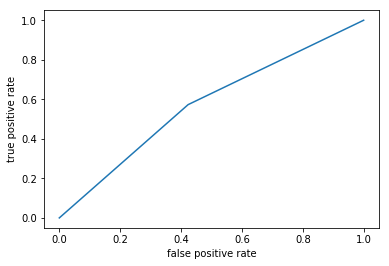

False-positive rate: [0.         0.42329873 1.        ]
True-positive rate:  [0.         0.57311321 1.        ]
AUC score:  0.5749072381449806


In [321]:
## DATA cleaning complete. Beginning testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(X_test))

In [322]:
#created decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [323]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# My model is predicted to be 58% accurate.

0.5865889212827988
[[595 272]
 [437 411]]
             precision    recall  f1-score   support

          0       0.58      0.69      0.63       867
          1       0.60      0.48      0.54       848

avg / total       0.59      0.59      0.58      1715

0.5854721605623382


In [324]:
#loading in validation data
vdf = pd.read_excel("validation_dataset.xlsx")
vdf.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [325]:
#editing data to keep same format
vdf = df.replace(r'\s+', np.nan, regex=True)
vdf.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,0.0,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,0.0,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [326]:
vdf['SPORT'] = vdf['SPORT'].fillna(0)
vdf = vdf.drop(['COMP'], axis=1)
vdf = vdf.drop(['CHILD'], axis=1)
vdf = vdf.drop(['GNDR'], axis=1)
vdf['INCOME'] = vdf['INCOME'].fillna(3)

vdf.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,1.0,0.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,3.0,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,1.0,0.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,0.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,0.0,65,194


In [327]:
vdf = vdf.dropna(subset=['AGE', 'OWNHOME'], how='all')

vdf = vdf.dropna()

vdf['VISITS'] = vdf['Y1G1'] + vdf['Y1G2'] + vdf['Y1G3'] + vdf['Y1G4'] + vdf['Y1G5']
vdf['BY'] = vdf['BACKER'] + (vdf['VISITS']/5)

vdf.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
OWNHOME     0
SPORT       0
PCTMARR     0
HOMEVAL     0
VISITS      0
BY          0
dtype: int64

In [328]:
validation = vdf[['BY', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 0 to 9214
Data columns (total 2 columns):
BY       5715 non-null float64
YEARS    5715 non-null int64
dtypes: float64(1), int64(1)
memory usage: 133.9 KB


In [329]:
fakeid = pd.DataFrame(vdf['FAKEID'])
fakeid.head()

,FAKEID
0,580V74KT
2,268D25AO
3,312Q12WV
4,420R23VB
7,594Y59EZ


In [330]:
#Collecting the responses from my model and placing them into a csv for export.

#Copied from model because I didn't see a more efficient way to do it.
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

In [331]:
#Other Data manipulations


In [332]:
#MULIPLE REGRESSION
runs_reg_model = sm.ols("Y2defect~Y1G5+Y1G4+Y1G3+Y1G2+Y1G1+Y1price+YEARS+BACKER+AGE+INCOME+OWNHOME+SPORT+PCTMARR+HOMEVAL",df3)
runs_reg = runs_reg_model.fit()
print runs_reg.summary()

                            OLS Regression Results                            
Dep. Variable:               Y2defect   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     21.87
Date:                Thu, 03 May 2018   Prob (F-statistic):           2.31e-55
Time:                        16:55:54   Log-Likelihood:                -3997.5
No. Observations:                5715   AIC:                             8025.
Df Residuals:                    5700   BIC:                             8125.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6831      0.052     13.182      0.0

In [333]:
runs_reg.mse_resid

0.23780640916986073

In [334]:
runs_reg.params

Intercept    0.683092
Y1G5        -0.073339
Y1G4         0.004900
Y1G3        -0.070062
Y1G2        -0.046375
Y1G1        -0.083278
Y1price     -0.001794
YEARS       -0.002195
BACKER      -0.138731
AGE          0.000795
INCOME       0.002086
OWNHOME     -0.016674
SPORT        0.048751
PCTMARR     -0.000206
HOMEVAL      0.000151
dtype: float64

In [335]:
# Dropping out the variables that do not show significance.
# (Y1G4, Y1Price, YEARS, INCOME, OWNHOME, SPORT, PCTMARR, HOMEVAL, AGE)
runs_reg2_model = sm.ols("Y2defect~Y1G5+Y1G3+Y1G2+Y1G1+Y1price+BACKER+HOMEVAL",df3)
runs_reg2 = runs_reg2_model.fit()
print runs_reg2.summary()

                            OLS Regression Results                            
Dep. Variable:               Y2defect   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     42.77
Date:                Thu, 03 May 2018   Prob (F-statistic):           3.19e-59
Time:                        16:55:55   Log-Likelihood:                -4000.9
No. Observations:                5715   AIC:                             8018.
Df Residuals:                    5707   BIC:                             8071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7019      0.022     31.303      0.0

In [336]:
runs_reg2.mse_resid

0.23779996539366316

In [337]:
runs_reg2.params

Intercept    0.701857
Y1G5        -0.073012
Y1G3        -0.069890
Y1G2        -0.046744
Y1G1        -0.083468
Y1price     -0.001824
BACKER      -0.140524
HOMEVAL      0.000165
dtype: float64

In [338]:
testing = vdf
testing.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,OWNHOME,SPORT,PCTMARR,HOMEVAL,VISITS,BY
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,1.0,0.0,77,203,3,1.6
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,1.0,0.0,50,38,2,1.4
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,0.0,60,68,3,0.6
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,0.0,65,194,1,0.2
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,1.0,0.0,50,483,3,1.6


In [339]:
c1 = testing[['Y1G5', 'Y1G3', 'Y1G2', 'Y1G1', 'Y1price', 'BACKER', 'AGE', 'HOMEVAL']]
runs_reg2.predict(c1)

0       0.367350
2       0.383765
3       0.459346
4       0.636603
7       0.457143
10      0.592917
11      0.625566
14      0.402882
16      0.421313
19      0.441509
20      0.591820
22      0.301575
23      0.287810
24      0.351356
26      0.525773
28      0.637836
29      0.532493
31      0.415144
32      0.275210
33      0.538800
34      0.692642
35      0.371455
37      0.520234
38      0.482393
39      0.363014
40      0.343276
41      0.385413
42      0.592178
47      0.457891
48      0.475467
          ...   
9151    0.504577
9152    0.433448
9155    0.411476
9163    0.629832
9165    0.391504
9166    0.619300
9168    0.609009
9169    0.551836
9170    0.557607
9172    0.610163
9173    0.704680
9174    0.318821
9177    0.333876
9178    0.463798
9181    0.394723
9183    0.667499
9184    0.752335
9186    0.446127
9188    0.596602
9190    0.629524
9191    0.355973
9197    0.398111
9198    0.486050
9199    0.461277
9201    0.534735
9202    0.688190
9207    0.588279
9209    0.6204

In [340]:
df4 = df3
df4 = df3.drop(['FAKEID'], axis =1)

In [341]:
y = df4['Y2defect'] 
X = df4.drop(['Y2defect'], axis =1)

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[ 0.00000000e+00,  0.00000000e+00,  4.21509373e-03, ...,
         8.55664028e-01, -8.77013478e-04, -7.40507667e-04],
       [ 1.06678844e-02,  0.00000000e+00,  0.00000000e+00, ...,
         4.05379606e-01, -1.78633724e-03, -1.78747870e-03],
       [ 9.00606599e-03,  0.00000000e+00,  9.00606599e-03, ...,
         6.12412488e-01, -2.04958249e-03, -4.09916497e-04],
       ...,
       [ 0.00000000e+00,  8.19369336e-03,  8.19369336e-03, ...,
         7.86594562e-01, -4.18394564e-04, -8.36789128e-05],
       [ 8.44159780e-03,  0.00000000e+00,  0.00000000e+00, ...,
         8.01951791e-01, -5.98652791e-04, -1.19730558e-04],
       [ 9.71558461e-03,  9.71558461e-03,  0.00000000e+00, ...,
         3.59476631e-01, -1.53880287e-03, -1.61029986e-03]])

In [342]:
m1 = lm.LinearRegression()
m1.fit(normalizedX, y)
m1_y = m1.predict(normalizedX)
print 'Coef ', m1.coef_
print "y-int ", m1.intercept_
print "mean square error: ", mean_squared_error(y, m1_y)
print explained_variance_score(y, m1_y)

Coef  [ -7.23078148   1.71747003  -7.00823921  -5.0562594   -9.74827575
  -0.13223464  -0.11866439 -17.09923842   0.12062078   0.63727838
   0.21109327   7.0345515    0.06474578  -0.0622226    2.15068786
   2.72258117]
y-int  0.6201679874092894
mean square error:  0.23815807606681913
0.04708174345039351


In [343]:
#And that is everything.

## Storytelling

1. Purpose:
The purpose of this assignment was to find useful information about the sports analytics data. We are looking to find correlations between the surveyed data and the ceasure to buy the next season's season tickets fot the sports company.


This data contained information on 9216 survey respondents on a variety of data points. (listed above)


CLeaning/Transforming the Data,
First I removed several of the columns that had too few data to be relevant, then I added a few assumptions. First, that anyone who did not mark SPORT with a yes is an assumed no. Second, that all people who did not mark their INCOME were median income earners. After these changes, I removed the remaining Null values in the data set.

After this was accomplished, I used a correlation analysis to determine which attributes were relevant to the Y2Defect variable. There seemed to be very little correlation between anything and Y2Defect, so i began posturing data in multiple forms. After much testing and not much gain in the correlations, I ended up with anew Variable that roughly combined the Backer, and games attended attributes. These attributes were the ones more closely correlated with the Y2Defect Data.

I then ran a decision tree model. The model gave an accuracy of about 57%.

After that I ran a regression model to determine which variables were the most useful. Then re-ran the decision tree model with that factored in. Gaining 2% accuracy (59%)

This is where I left off the data processing.

Conclusions,

The main question is predicting the most likely people to not return for season ticket next year, which my model does at 59% accuracy. 

The most important indicators are the Y1G5, Y1G3, Y1G2, Y1G1, Y1price, HOMEVAL, and BACKER attributes according to the multiple linear regression I ran. This means that games 1, 3, and 5 were the most important to the choice, along with whether or not a person is a part of the Backer Club.

Therefore, I recommend that the team target these areas. For the games, based on the information, I think game 2 would also be a statistically relevant, given that the other 4games are considered relevant. It would be in the team's best interest to use the games and make sure they are as enticing as possible. Secondly, rewarding the members of the Backer club to ensure they feel the value of being a backer is worth the cost. Thirdly, keep the price low for the season passes. HOMEVAL is also noted as statistically relevant, but looking at the .00002 coefficient, I'm inclined to think it does not matter a great deal.